## Some Statistical Concepts and Notations

Let $({\Omega, \Sigma, \Pr})$ a probability space, $X$ is random variable function in the Probability space.

The '''expectation of $X$''', written $E(X)$, is defined as:

$E(X) := \sum_{x \mathop \in \text{Img}(X)} x\Pr({X = x})$

Here $Pr$ is Probability Mass Function.
"In a more simple terms" $E(X)$ is just the average of random variables.

### Example

Given $X \to \{1, 2, 3\}$

$E(X) = (1+2+3)/3$

Because $Pr(X=1) = Pr(X=2) = Pr(X=3) = 1/3$

### Common notations

The notation $\mu_X = E(X)$

The notation $\sigma_X = E((X-\mu_X)^2) = \sqrt{E(X^2)-\mu_X^2}$

# Covariance

Covariance show the linear relation between multiple variables (positive, negative or no correlation)

$$\text{cov}(X,Y) = E((X-\mu_X)(Y-\mu_Y))$$

Important Memoization! Variance can be seen as $\text{cov}(X,X)$

# Correlation 

Is measure of dependence between two random variables.

$$\text{corr}(X,Y)= \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$







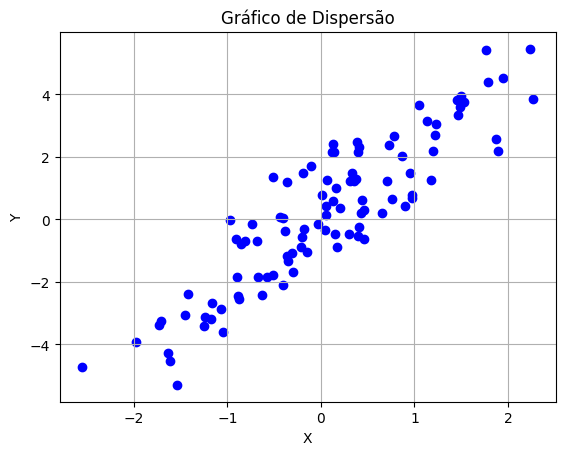

Covariância: 2.169865616574274
Correlação: 0.9006752160894267


In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100) # A soma com X causa forte correlação e covariancia positiva

covariance = np.cov(x, y)[0][1]
correlation = np.corrcoef(x, y)[0][1]

plt.scatter(x, y, color='blue')
plt.title('Gráfico de Dispersão')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

print(f'Covariância: {covariance}')
print(f'Correlação: {correlation}')

# Observation (Example)

<!-- # Observation Example

Let $\struct {\Omega, \Sigma, \Pr}$ be a [[Definition:Probability Space|probability space]].

Let $X$ be a [[Definition:Discrete Random Variable|discrete random variable]] on $\struct {\Omega, \Sigma, \Pr}$.

Then $x \in \img(X)$ is a [[Definition:Observation|observation]]
-->

Let $({\Omega, \Sigma, \Pr})$ be a Probability Space

Let $X$ be a Discrete Random Variable.

Then
    $x \in \text{Img}(X)$ is a Observation

But observation can be seen to as $O \in \text{Img}(X)$

# Lag

Is a constant time interval $d$ between observations. (Can be seen a Function that generate Lagged Random Variable Function or Lagged Function, this is probably a better definition)

For every $X_t$ a lagged value is $X_{t+d}$


# Auto-Covariance

Is a Covariance betten a Lag, normally defined as $\gamma_k$ or $\gamma_{X,X}(t, t+k)$.

$$\gamma_k := \text{cov}({X_t, X_{t + k} })$$

# Auto-Correlation

Is a Correlation betten a Lag, normally defined as $\rho_k$ or $\rho_{X,X}(t, t+k)$.

$$\rho_k := \frac{\text{cov}({X_t, X_{t + k} })}{\sigma_X(t)\sigma_X(t+k)}$$




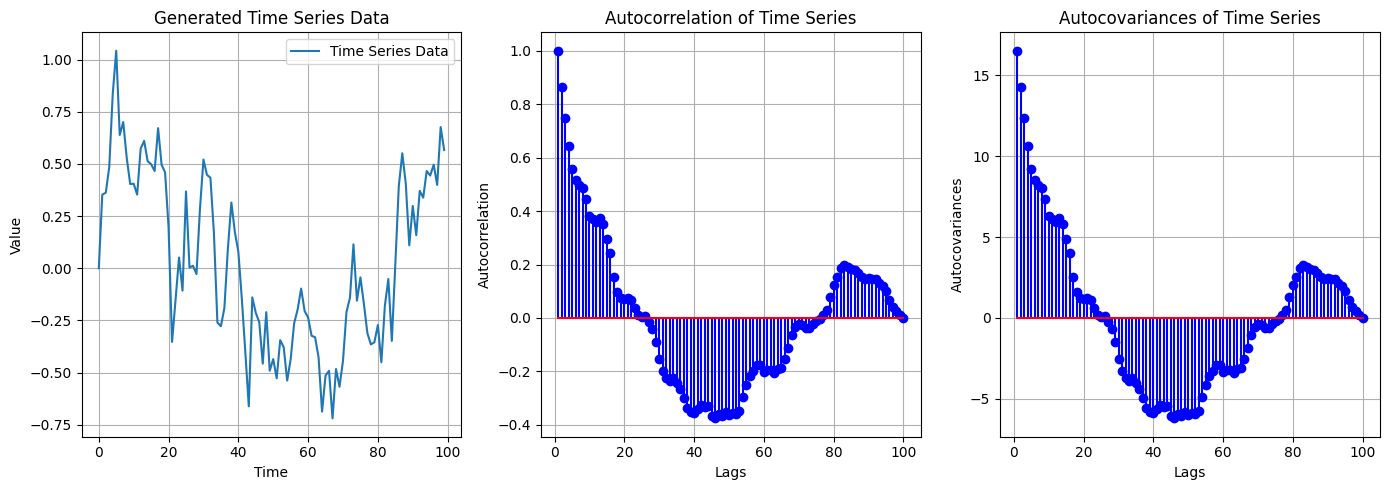

Autocovariância para lag 1: 14.268933202900342
Autocorrelação para lag 1: 0.8632831228857545


In [80]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.zeros(100)
for t in range(1, 100):
    data[t] = 0.8 * data[t-1] + 0.2 * np.random.normal()
    
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    maxcorr = np.argmax(result) # This is not the same as the equation, i used other method of normalization
    result = result / result[maxcorr]
    return result[result.size//2:]

def autocov(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]
    
autocovariances = autocov(data)
autocorrelations = autocorr(data)

lags = np.arange(1, len(autocorrelations) + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(data, label='Time Series Data')
plt.title('Generated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.stem(lags, autocorrelations, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Autocorrelation of Time Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.stem(lags, autocovariances, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Autocovariances of Time Series')
plt.xlabel('Lags')
plt.ylabel('Autocovariances')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Autocovariância para lag 1: {autocovariances[1]}')
print(f'Autocorrelação para lag 1: {autocorrelations[1]}')

The graphs can look the same, but the Autocorrelation graph is normalized.
<!--
Código
lb_test, lb_pvalue = acorr_ljungbox(data, lags=[10], return_df=False, boxpierce=False)
bp_test, bp_pvalue = acorr_ljungbox(data, lags=[10], return_df=False, boxpierce=True)
-->

# Box-Pierce Test

Let $n \in \max(\text{dom}(X))$ and $l$ is a constant of lags to be tested:

$$Q = n \sum_{k=1}^{l}\rho_k^2$$



# Ljusg-Box Text

Let $n \in \max(\text{dom}(X))$ and $l$ is a constant of lags to be tested:

$$Q^* = n(n+2) \sum_{k=1}^{l}{\frac{\rho_k^2}{n-k}}$$

### Result Analysis.

If both $Q$ and $Q^*$ is bigger than Chi-squared distribution or are alike, then the autocorrelation did come from white noise.

We use the Chi-squared test, were p-value $p$ and $p < 0.05$ shows correlation, so after aplying the test if $p < 0.05$ so the data is correlated, if $p > 0.05$ so it probably comes from White-Noise.

In [87]:
from scipy.stats import chi2

def box_pierce_test(data, lags):
    n = len(data)
    acf = [np.correlate(data, data, mode='full')[n-1+i]/np.var(data)/n for i in range(lags)]
    Q = n * np.sum(np.array(acf)**2)
    p_value = 1 - chi2.cdf(Q, lags)
    return Q, p_value

def ljung_box_test(data, lags):
    n = len(data)
    acf = [np.correlate(data, data, mode='full')[n-1+i]/np.var(data)/n for i in range(lags)]
    Q = n * (n + 2) * np.sum(np.array(acf)**2 / (n - np.arange(1, lags + 1)))
    p_value = 1 - chi2.cdf(Q, lags)
    return Q, p_value

lags = 10
bp_test, bp_pvalue = box_pierce_test(data, lags)
lb_test, lb_pvalue = ljung_box_test(data, lags)

print(f'Test Ljung-Box (Q-Stat): {lb_test}')
print(f'P-value Test Ljung-Box: {lb_pvalue}')
print(f'Test Box-Pierce (Q-Stat): {bp_test}')
print(f'P-value Test Box-Pierce: {bp_pvalue}')

Test Ljung-Box (Q-Stat): 443.80417826917466
P-value Test Ljung-Box: 0.0
Test Box-Pierce (Q-Stat): 418.03510780950904
P-value Test Box-Pierce: 0.0
